In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib as mpl

In [5]:
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf

In [7]:
from tensorflow import keras

In [8]:
keras.__version__

'2.8.0'

In [9]:
tf.__version__

'2.8.0'

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

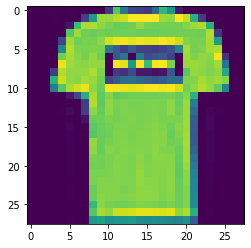

In [11]:
plt.imshow(x_train_full[1])

In [12]:
y_train_full[1]

0

In [13]:
class_names = ["T-Shirt/Top", "Trouser", "Pull_over", "Dress", "Coat", "Sandal", "Shirt", 
              "Sneaker", "Bag", "Ankle_boot"]

In [14]:
class_names[y_train_full[1]]

'T-Shirt/Top'

In [15]:
x_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [16]:
x_train_n = x_train_full/255.0
x_test_n = x_test / 255.0

In [17]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

In [18]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


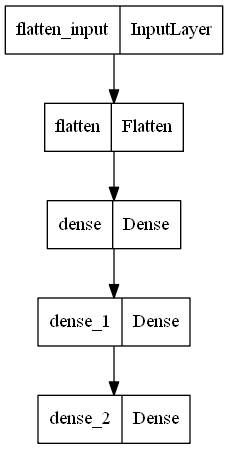

In [22]:
import pydot
keras.utils.plot_model(model)

In [23]:
pydot.__version__

'1.4.1'

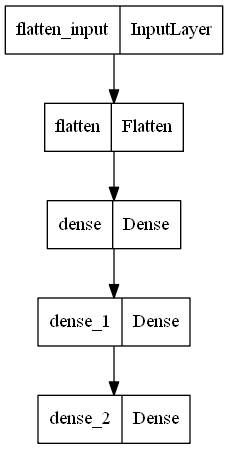

In [24]:
import pydot
keras.utils.plot_model(model)

In [25]:
weights, biases = model.layers[1].get_weights()

In [26]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
biases.shape

(300,)

In [30]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [31]:
model_history = model.fit(x_train, y_train, epochs = 30,
                         validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 18s 6ms/step - loss: 0.7239 - accuracy: 0.7643 - val_loss: 0.5219 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4842 - accuracy: 0.8320 - val_loss: 0.4352 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4389 - accuracy: 0.8455 - val_loss: 0.5308 - val_accuracy: 0.7992
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4121 - accuracy: 0.8565 - val_loss: 0.3921 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3936 - accuracy: 0.8621 - val_loss: 0.3751 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3749 - accuracy: 0.8678 - val_loss: 0.3722 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3629 - accuracy: 0.8717 - val_loss: 0.3618 - val_accu

In [32]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [33]:
model_history.history

{'loss': [0.7238965630531311,
  0.48415836691856384,
  0.43889591097831726,
  0.4120647609233856,
  0.3936067521572113,
  0.37486937642097473,
  0.3628641664981842,
  0.35139599442481995,
  0.3410114347934723,
  0.3317844569683075,
  0.3237471282482147,
  0.31453177332878113,
  0.3078290820121765,
  0.30171430110931396,
  0.2942585051059723,
  0.28870847821235657,
  0.28371602296829224,
  0.2774938941001892,
  0.2727583348751068,
  0.2669668197631836,
  0.2624574601650238,
  0.25758692622184753,
  0.25346407294273376,
  0.24840374290943146,
  0.24411903321743011,
  0.24027960002422333,
  0.23619644343852997,
  0.23246249556541443,
  0.22811973094940186,
  0.22490420937538147],
 'accuracy': [0.7643091082572937,
  0.8320000171661377,
  0.8455091118812561,
  0.8565454483032227,
  0.8620908856391907,
  0.8677636384963989,
  0.8717091083526611,
  0.8751999735832214,
  0.8792545199394226,
  0.8825818300247192,
  0.883545458316803,
  0.8868545293807983,
  0.8898181915283203,
  0.8912545442581

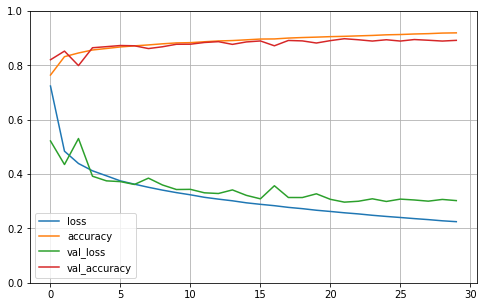

In [34]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
##plt.gca().set_xlim(0,1)
plt.show()

In [35]:
model_history = model.fit(x_train, y_train, epochs = 30,
                         validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2203 - accuracy: 0.9202 - val_loss: 0.2894 - val_accuracy: 0.8962
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2169 - accuracy: 0.9225 - val_loss: 0.2926 - val_accuracy: 0.8976
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2134 - accuracy: 0.9229 - val_loss: 0.3786 - val_accuracy: 0.8626
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2100 - accuracy: 0.9253 - val_loss: 0.2960 - val_accuracy: 0.8930
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2083 - accuracy: 0.9246 - val_loss: 0.2814 - val_accuracy: 0.8960
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2027 - accuracy: 0.9274 - val_loss: 0.3010 - val_accuracy: 0.8914
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2000 - accuracy: 0.9292 - val_loss: 0.2915 - val_accura

In [36]:
model_history = model.fit(x_train, y_train, epochs = 30,
                         validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1347 - accuracy: 0.9526 - val_loss: 0.3006 - val_accuracy: 0.8974
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1336 - accuracy: 0.9530 - val_loss: 0.3171 - val_accuracy: 0.8916
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1308 - accuracy: 0.9542 - val_loss: 0.3578 - val_accuracy: 0.8790
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.1286 - accuracy: 0.9543 - val_loss: 0.2975 - val_accuracy: 0.8974
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1273 - accuracy: 0.9543 - val_loss: 0.2996 - val_accuracy: 0.9028
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1243 - accuracy: 0.9556 - val_loss: 0.3283 - val_accuracy: 0.8968
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1228 - accuracy: 0.9576 - val_loss: 0.3193 - val_accura

In [37]:
model_history.history

{'loss': [0.1346614956855774,
  0.13364261388778687,
  0.1308346390724182,
  0.12859931588172913,
  0.1273251473903656,
  0.12429969012737274,
  0.12276976555585861,
  0.12096397578716278,
  0.11795690655708313,
  0.11653563380241394,
  0.11578159034252167,
  0.11176945269107819,
  0.11102285236120224,
  0.1089484840631485,
  0.10708439350128174,
  0.1063251867890358,
  0.1034424751996994,
  0.10175509005784988,
  0.10131813585758209,
  0.09864825755357742,
  0.09750813245773315,
  0.09564843028783798,
  0.09422781318426132,
  0.09273774921894073,
  0.09074026346206665,
  0.08978962898254395,
  0.08876198530197144,
  0.08736874908208847,
  0.08554727584123611,
  0.0839417576789856],
 'accuracy': [0.9526000022888184,
  0.953000009059906,
  0.9541817903518677,
  0.9542909264564514,
  0.9542909264564514,
  0.9556182026863098,
  0.9575818181037903,
  0.9575636386871338,
  0.9581272602081299,
  0.9598363637924194,
  0.9591272473335266,
  0.9618545174598694,
  0.9614545702934265,
  0.9616545

In [38]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

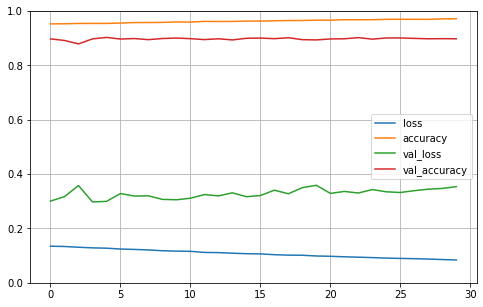

In [39]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
##plt.gca().set_xlim(0,1)
plt.show()

In [40]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3894 - accuracy: 0.8907


[0.38940489292144775, 0.8906999826431274]

In [42]:
x_new = x_test[:3]

In [43]:
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [51]:
y_pred = np.argmax(model.predict(x_new), axis=-1)
#y_pred = model.predict_classes(x_new)  --> this line is depreciated in tensorflow 2021-01-01> versions
y_pred

array([9, 2, 1], dtype=int64)

In [52]:
class_names

['T-Shirt/Top',
 'Trouser',
 'Pull_over',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle_boot']

In [55]:
np.array(class_names)[y_pred]

array(['Ankle_boot', 'Pull_over', 'Trouser'], dtype='<U11')

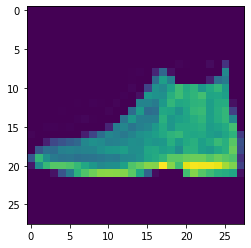

In [57]:
plt.imshow(x_test[0])

AxesImage(54,36;334.8x217.44)


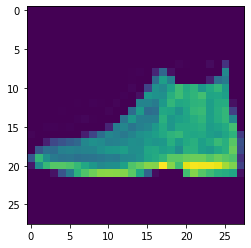

In [58]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


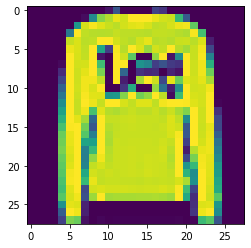

In [59]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


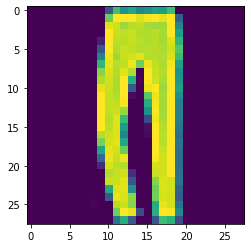

In [60]:
print(plt.imshow(x_test[2]))